In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load the data

In [2]:
data = pd.read_excel('results/classification_results.xlsx')
data['Expected Category'] = data['Expected Category'].astype(str)
data['Detected Category'] = data['Detected Category'].astype(str)

# Basic Classification Metrics

In [4]:
print("Classification Report:")
print(classification_report(data['Expected Category'], data['Detected Category'], zero_division=1))

Classification Report:
                             precision    recall  f1-score   support

           BINARY_VISUAL_QA       1.00      1.00      1.00        15
              GEOSPATIAL_QA       1.00      1.00      1.00        15
 IMAGE_RETRIEVAL_BY_CAPTION       1.00      0.67      0.80        15
   IMAGE_RETRIEVAL_BY_IMAGE       1.00      1.00      1.00        15
IMAGE_RETRIEVAL_BY_METADATA       0.88      0.93      0.90        15
         IMAGE_SEGMENTATION       1.00      1.00      1.00        15
            OBJECT_COUNTING       1.00      1.00      1.00        15
                        nan       0.00      1.00      0.00         0

                   accuracy                           0.94       105
                  macro avg       0.86      0.95      0.84       105
               weighted avg       0.98      0.94      0.96       105



# Confusion Matrix

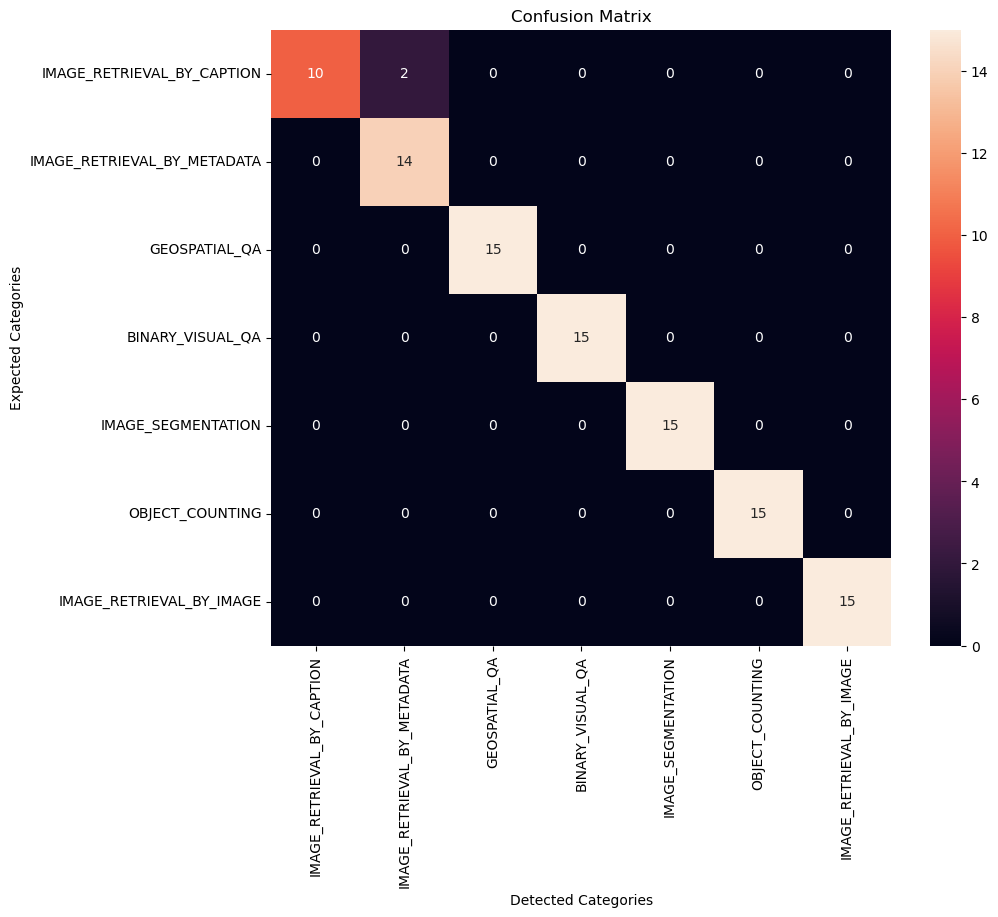

In [5]:
conf_matrix = confusion_matrix(data['Expected Category'], data['Detected Category'], labels=data['Expected Category'].unique())
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=data['Expected Category'].unique(), yticklabels=data['Expected Category'].unique())
ax.set_xlabel('Detected Categories')
ax.set_ylabel('Expected Categories')
ax.set_title('Confusion Matrix')
plt.show()

# Misclassified Examples Analysis

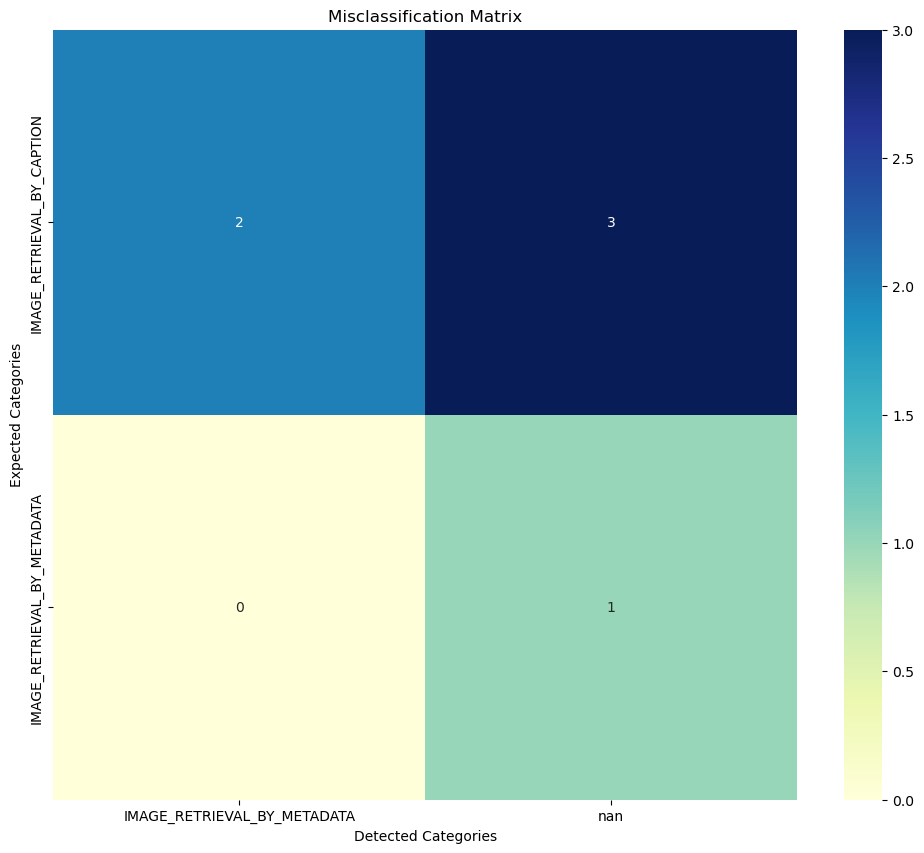

In [6]:
misclassified = data[data['Expected Category'] != data['Detected Category']]
misclassified_counts = misclassified.groupby(['Expected Category', 'Detected Category']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(misclassified_counts, annot=True, cmap="YlGnBu")
ax.set_xlabel('Detected Categories')
ax.set_ylabel('Expected Categories')
ax.set_title('Misclassification Matrix')
plt.show()